In [ ]:
# https://zhuanlan.zhihu.com/p/692810462 RF
# https://zhuanlan.zhihu.com/p/692505141 SVM

# https://zhuanlan.zhihu.com/p/112009086 Xboost

In [1]:
setwd('/import/DB/fel/BJTC-204')

In [2]:
load('./zisha.rda')

In [3]:
expr[,1:dim(expr)[2]] = 2^expr[,1:dim(expr)[2]] -1

In [4]:
head(expr)

,GLI3,IAPP,FAM76A,WDR45,SOS1,PRR14,NTHL1,MUS81,SLC7A9,CEACAM21,...,HHLA1,UCK2,CNIH3,LOC100129361,VWF,TRPM8,OTUD4,RRM2,DDX25,PHKG1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GSM2432065,150.2379,22.75323,30.64645,235.6315,38.31933,197.7080,62.40287,144.9726,39.05164,68.52737,...,165.8396,78.96145,74.32081,355.8458,260.7698,66.03579,32.26012,121.2806,318.7423,57.67854
GSM2431907,140.0775,20.86586,34.53170,183.9685,55.83828,215.6268,76.87981,145.9132,32.77870,50.71883,...,150.0496,64.94813,60.02275,284.8974,262.2910,67.58613,29.37481,112.5035,258.9484,56.34020
GSM2431944,183.3457,24.34759,37.28798,130.4894,75.55836,262.7534,57.63320,190.3423,42.98645,89.46523,...,163.3397,113.02408,39.50618,258.2815,221.3513,104.46321,30.25155,129.5323,372.0396,102.64417
GSM2432077,137.3575,22.97673,29.92308,184.4881,49.48812,205.3013,59.18888,167.4582,41.81234,75.63175,...,222.1424,60.58666,57.39404,278.7903,224.3656,81.80710,31.26298,114.4643,239.5378,63.72416
GSM2431900,191.4956,20.96186,32.61250,167.6628,54.27969,240.3859,59.84839,181.6757,54.16294,91.65452,...,164.5876,82.37130,37.07743,222.6063,258.5344,102.12523,31.49775,109.8880,417.7234,89.90672
GSM2431925,190.0465,25.06705,35.20097,126.4573,69.00612,241.2800,49.30382,162.1956,44.49737,80.58555,...,199.2527,75.94591,59.32206,199.1496,265.9540,125.86518,34.59659,126.8503,335.0412,93.13478


In [5]:
y = death

In [6]:
colnames(expr) = gsub('-','.',colnames(expr))

In [7]:
expr <- expr[, !grepl("^\\d+", names(expr))]

In [8]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [9]:
x = as.matrix(expr)
y = y

In [10]:
library(randomForest)

Warning message:
"package 'randomForest' was built under R version 4.2.3"
randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine




png 
  2

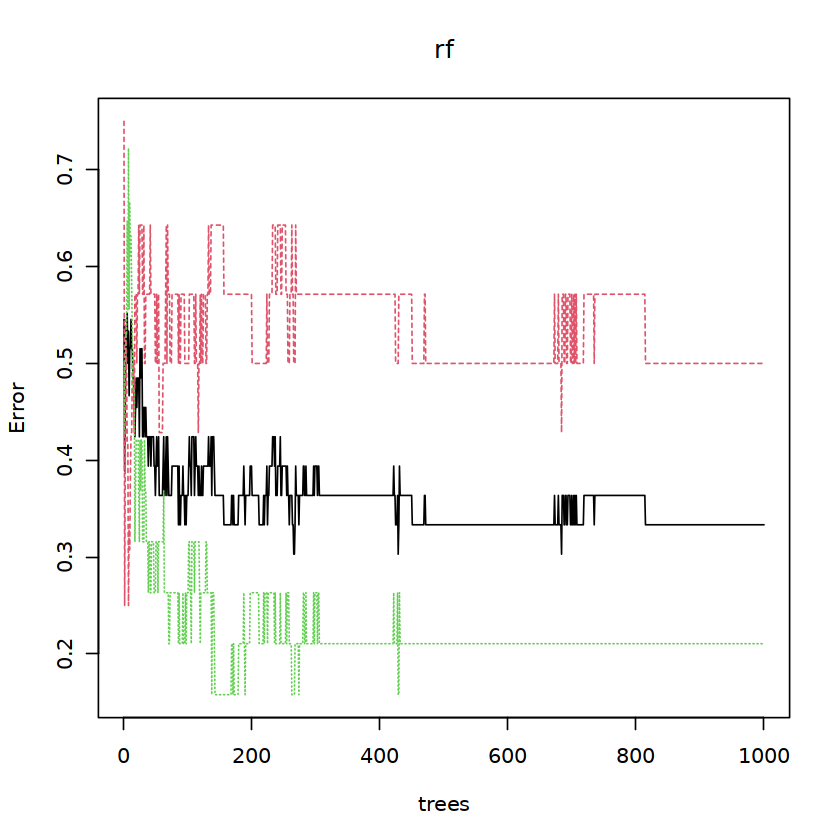

In [15]:
set.seed(101)

rf = randomForest(as.factor(y)~.,data = x,ntree =1000,important=TRUE,proximity=TRUE)

plot(rf)

pdf('forest.pdf',height = 6,width = 6)
plot(rf)
dev.off()

trees = which.min(rf$err.rate[,1])

rf = randomForest(as.factor(y)~.,data = x,ntree =trees,important=TRUE,proximity=TRUE)

importance = importance(rf)

In [ ]:


# pdf('forest2.pdf',height = 6,width = 4)
# varImpPlot(rf,main = '')
# dev.off()

# # RPE65 + MC3R+NFIL3 + PRF1 + IL6

# options(repr.plot.width = 4)

# varImpPlot(rf,main = '')

# rfGenes=importance[order(importance[, "MeanDecreaseGini"], decreasing  = TRUE),] #重要性评分大于2的基因

# rfGenes

In [29]:
# rfGenes=names(rfGenes[rfGenes>30]) 
# write.table(rfGenes,file="rfGenes.txt",sep="\t",quote=F,col.names=F,row.names=F) #输出表达量

# expr2 = exp4

# sigExp=expr2[rfGenes,]
# write.table(data.frame(ID=rownames(sigExp),sigExp),file="rfGeneExp.txt",sep="\t",quote=F,col.names=T,row.names=F) 

# rfGenes

### svm

In [30]:
# library(tidyverse)
# library(glmnet)
# library(VennDiagram)
# library(e1071)
# library(caret)
# library(randomForest)

# x = as.matrix(expr)

# y=as.numeric(as.factor(Type))

# library(future)
# plan("multisession",workers=30)

# set.seed(1)
# rfeControl = rfeControl(functions = caretFuncs,
#                         method = "cv", # 默认自助法重采样 boot
#                         saveDetails = T, # 保存预测值和变量重要性
#                         number = 5, # 重抽样次数
#                         allowParallel = T # 允许多线程，用这个之前你要先准备好多线程！
#                         )

# Profile=rfe(x=x,y=as.factor(y),sizes =c(1:32),
#     rfeControl =  rfeControl,
#     methods="svmRadial")

# Profile

# pdf(file="SVM-RFE.pdf", width=6, height=5.5)
# par(las=1)
# x= Profile$results$Variables 
# y =Profile$results$RMSE
# plot(x, y, xlab="Variables", ylab="RMSE (Cross-Validation)", col="darkgreen") 
# lines(x, y, col="darkgreen")
# wmin=which.min(y) 
# wmin.x=x[wmin] 
# wmin.y=y[wmin]
# points(wmin.x, wmin.y, col="blue", pch=16)
# text(wmin.x, wmin.y, paste0('N=', wmin.x), pos=2, col=2)
# dev.off()

# par(las=1)
# x= Profile$results$Variables 
# y =Profile$results$RMSE
# plot(x, y, xlab="Variables", ylab="RMSE (Cross-Validation)", col="darkgreen") 
# lines(x, y, col="darkgreen")
# wmin=which.min(y) 
# wmin.x=x[wmin] 
# wmin.y=y[wmin]
# points(wmin.x, wmin.y, col="blue", pch=16)
# text(wmin.x, wmin.y, paste0('N=', wmin.x), pos=2, col=2)

# #输出
# featureGenes = Profile$optVariables
# write.table(file="SVM-RFE.gene.txt",featureGenes,sep="\t",quote=F,row.names=F,col.names=F) #表达矩阵 

# featureGenes

### Boruta

In [ ]:
# library(Boruta)

# y

# set.seed(111)
# boruta <- Boruta(x=x, y=y, pValue=0.05, mcAdj=T, 
#        maxRuns=300)

# boruta

# table(boruta$finalDecision)

# boruta$finalDecision

# Boruta::plotImpHistory(boruta)

# library(dplyr)
# boruta.imp <- function(x){
#   imp <- reshape2::melt(x$ImpHistory, na.rm=T)[,-1]
#   colnames(imp) <- c("Variable","Importance")
#   imp <- imp[is.finite(imp$Importance),]

#   variableGrp <- data.frame(Variable=names(x$finalDecision), 
#                             finalDecision=x$finalDecision)

#   showGrp <- data.frame(Variable=c("shadowMax", "shadowMean", "shadowMin"),
#                         finalDecision=c("shadowMax", "shadowMean", "shadowMin"))

#   variableGrp <- rbind(variableGrp, showGrp)

#   boruta.variable.imp <- merge(imp, variableGrp, all.x=T)

#   sortedVariable <- boruta.variable.imp %>% group_by(Variable) %>% 
#     summarise(median=median(Importance)) %>% arrange(median)
#   sortedVariable <- as.vector(sortedVariable$Variable)


#   boruta.variable.imp$Variable <- factor(boruta.variable.imp$Variable, levels=sortedVariable)

#   invisible(boruta.variable.imp)
# }
# boruta.variable.imp <- boruta.imp(boruta)


# boruta

# library(YSX)

# sp_boxplot(boruta.variable.imp, melted=T, xvariable = "Variable", yvariable = "Importance",
#            legend_variable = "finalDecision", legend_variable_order = c("shadowMax", "shadowMean", "shadowMin", "Confirmed"),
#            xtics_angle = 90)

# expr = cbind(Type,expr)

# colnames(expr)[1]  ='Group'

# expr3 = expr

# set.seed(147)  
# index <-  which( (1:nrow(expr3))%%3 == 0 )
# train <- expr3[-index,]
# test <- expr3[index,]

# table(test$Group)

# library("xgboost")
# library("Matrix")
# train_matrix <- sparse.model.matrix(Group ~ .-1, data = train)
# test_matrix <- sparse.model.matrix(Group ~ .-1, data = test)
# all_matrix <- sparse.model.matrix(Group ~ .-1, data = expr3)



# train_label <- as.numeric(train$Group == 'MDD')
# test_label <-  as.numeric(test$Group == 'MDD')
# all_label <-  as.numeric(expr3$Group == 'MDD')

# all_label

# train_fin <- list(data=train_matrix,label=train_label) 
# test_fin <- list(data=test_matrix,label=test_label) 
# all_fin <- list(data=all_matrix,label=all_label) 

# dtrain <- xgb.DMatrix(data = train_fin$data, label = train_fin$label) 
# dtest <- xgb.DMatrix(data = test_fin$data, label = test_fin$label)
# dall <- xgb.DMatrix(data = all_fin$data, label = all_fin$label)

# xgb <- xgboost(data = dall,max_depth=6, eta=0.5,  
#   objective='binary:logistic', nround=25)

# xgb

# importance <- xgb.importance(all_matrix@Dimnames[[2]], model = xgb)  
# head(importance)
# xgb.ggplot.importance(importance)

# xgb.plot.importance(importance)

In [55]:
# lasso

In [16]:
library(lars) 
library(glmnet) 

Warning message:
"package 'lars' was built under R version 4.2.3"
Loaded lars 1.3


Warning message:
"package 'glmnet' was built under R version 4.2.3"
Loading required package: Matrix

Warning message:
"package 'Matrix' was built under R version 4.2.3"
Loaded glmnet 4.1-8



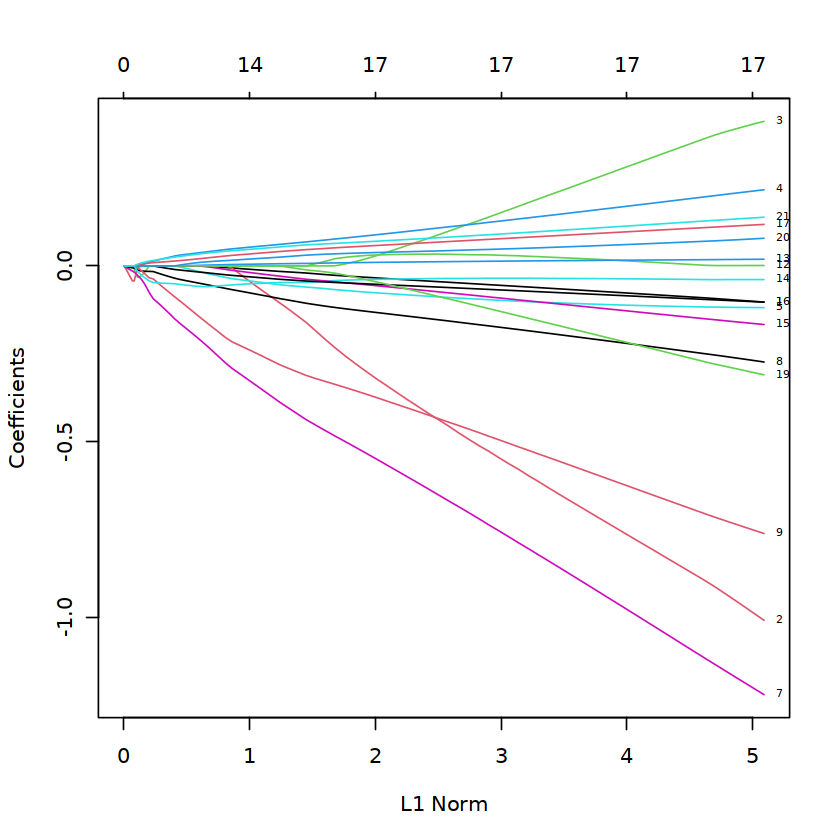

In [17]:
#用基因的表达情况预测生死
model_lasso <- glmnet(x, y, family="binomial", nlambda=100, alpha=1)#拉手回归模型
plot(model_lasso, xvar = "norm", label = TRUE)

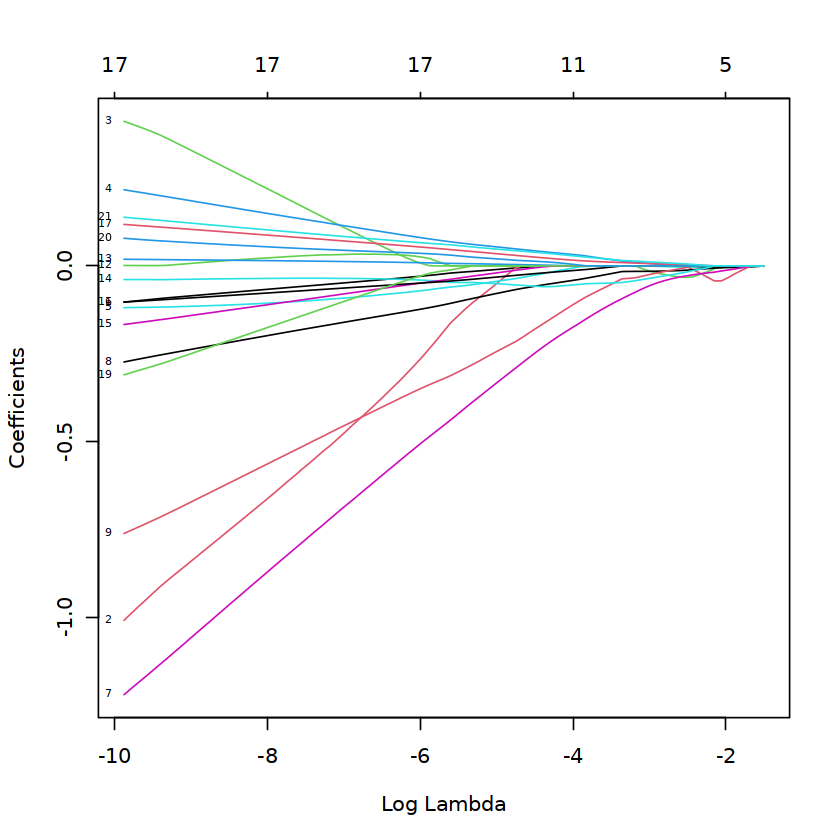

In [18]:
plot(model_lasso, xvar="lambda", label=TRUE)

In [19]:
cv_fit <- cv.glmnet(x=x, y=y, alpha = 1, nlambda = 100)

[1] 0.01805301 0.22256595

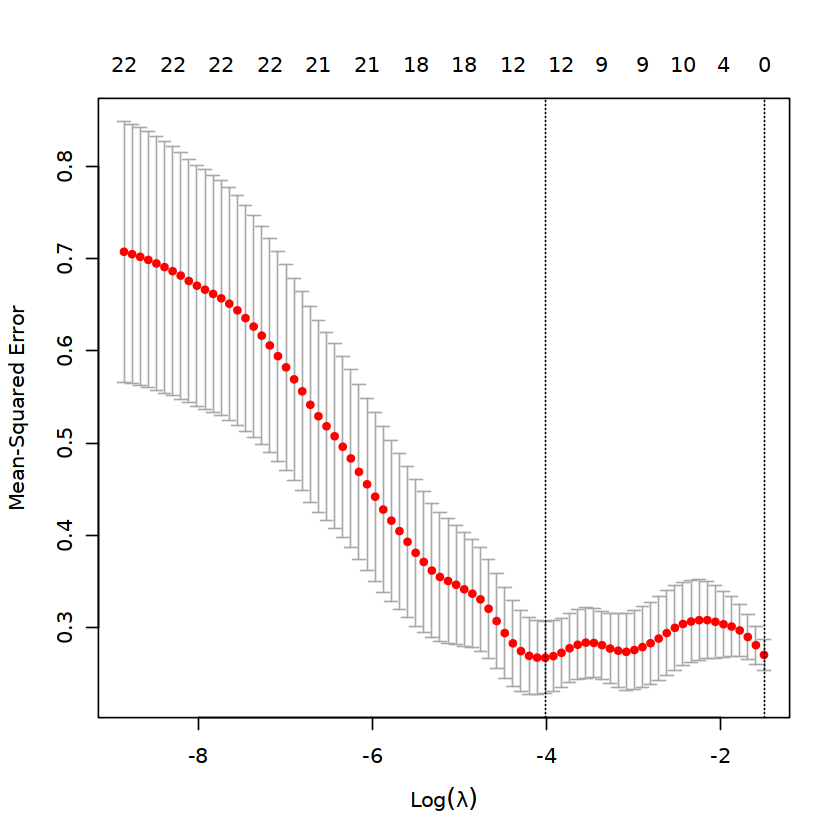

In [20]:
plot(cv_fit)
# 两条虚线分别指示了两个特殊的λ值:
c(cv_fit$lambda.min,cv_fit$lambda.1se) 

In [21]:
model_lasso <- glmnet(x=as.matrix(x), y=y, alpha = 1, lambda=cv_fit$lambda.min	)
gene_1se <- rownames(model_lasso$beta)[as.numeric(model_lasso$beta)!=0]
gene_1se = gsub('[.]',' ',gene_1se)

In [22]:
gene_1se

[1] "WDR45"        "SOS1"         "NTHL1"        "MUS81"        "SLC7A9"      
 [6] "CEACAM21"     "HHLA1"        "UCK2"         "LOC100129361" "VWF"         
[11] "RRM2"         "DDX25"

### 韦恩图

In [63]:
importance$Feature

[1] "SPINT2"    "BAIAP3"    "HPCAL4"    "HS3ST2"    "CALB2"     "TBR1"     
 [7] "PIM2"      "ME3"       "PGK1"      "LOC729580" "RALB"      "DOC2A"    
[13] "TBC1D9"    "STMN4"     "C20orf24"  "SMARCD3"   "GNE"       "RAD51C"   
[19] "LARGE"     "PINK1"     "RFK"       "CYB561"    "SLC8A2"    "B4GALT3"  
[25] "REPS2"     "CES2"      "ERCC1"     "SFXN3"     "IDH3B"     "RIMS1"    
[31] "ROBLD3"    "RABEPK"    "ACTR10"    "KCNAB1"    "PCSK1"     "C18orf10" 
[37] "RSL1D1"    "DBNDD1"    "MED6"      "TRIAP1"    "PORCN"     "F12"      
[43] "TUBG2"     "GABRA5"    "BAP1"      "GLRX2"     "MRPL46"    "PAK6"     
[49] "PRSS3"     "DDRGK1"    "UBE2M"     "NDUFA9"    "SMYD3"     "PID1"     
[55] "PPP3R1"    "AKAP12"    "LIMK1"     "RBM9"      "GDAP1L1"   "PTPRN2"   
[61] "CLPTM1"    "DDA1"      "OLFM1"     "CCKBR"     "SIAH2"     "POLS"     
[67] "NIPSNAP1"  "ATP2B2"    "FBXL15"    "MLF2"      "ATP6V1A"   "PPIE"     
[73] "ANXA6"     "AMPH"      "CYTH2"     "BHLHB9"    "KCNJ9"     "ENDOG"    
[79] "HSPB11"    "ARMCX2"    "KCNAB2"    "EIF1B"     "PIN1"      "WDR82"    
[85] "C1orf216"  "SAE1"      "SEZ6L2"    "AURKAIP1"  "DCTN3"     "PPID"     
[91] "ACTR1B"    "RABIF"     "DBP"       "DNM1L"     "GLRX5"

In [64]:
RF.gene = names(rfGenes)[1:10]
#SVF.RFE.gene = featureGenes
XGBoost.gene = importance$Feature[1:10]

In [65]:
boruta.variable.imp2 = boruta.variable.imp %>% dplyr::filter(finalDecision %in% c('Confirmed','Tentative')) %>% dplyr::select(Variable) %>% unique()

In [66]:
Boruta.gene = as.vector(boruta.variable.imp2$Variable)

In [67]:
lasso.gene  = gene_1se

In [68]:
list1 = list(RF.gene,lasso.gene,Boruta.gene,XGBoost.gene)

In [69]:
data =  as.data.frame (do.call (cbind, list1))

Warning message in (function (..., deparse.level = 1) :
"number of rows of result is not a multiple of vector length (arg 1)"


In [70]:

library(venn)
        library(VennDiagram)
        color=c( "#3C5488B2","#00A087B2", 
             "#F39B7FB2","#91D1C2B2", 
             "#8491B4B2", "#DC0000B2", 
             "#7E6148B2","yellow", 
             "darkolivegreen1", "lightskyblue", 
             "darkgreen", "deeppink", "khaki2", 
             "firebrick", "brown1", "darkorange1", 
             "cyan1", "royalblue4", "darksalmon", 
             "darkgoldenrod1", "darkseagreen", "darkorchid")

    if (ncol(data) == 2){
        sample_list <- list(c1 = data[,1], c2 = data[,2])
    }else if(ncol(data) == 3){
        sample_list <- list(RF.gene = data[,1], Boruta.gene = data[,2], XGBoost.gene = data[,3])
    }else if(ncol(data) == 4){
        sample_list <- list(RF.gene = data[,1], SVF.RFE.gene = data[,2], Boruta.gene = data[,3], XGBoost.gene = data[,4])
    }else{
        sample_list <- list(c1 = data[,1], c2 = data[,2], c3 = data[,3], c4 = data[,4], c5 = data[,5])
    }
    
    q <- venn.diagram(sample_list,filename = NULL,
             fill = color[1:(length(sample_list))],
             alpha = 0.50, cat.col = rep('black', ncol(data)), 
             col = 'black', cex = 1, fontfamily = 'serif', cat.cex = 1, cat.fontfamily = 'serif', margin = 0.2
                             )
    pdf(paste0('./',"venn.pdf"))
    grid.draw(q)
    dev.off()

Warning message:
"package 'venn' was built under R version 4.2.3"
Loading required package: grid

Loading required package: futile.logger

Warning message:
"package 'futile.logger' was built under R version 4.2.3"


png 
  2

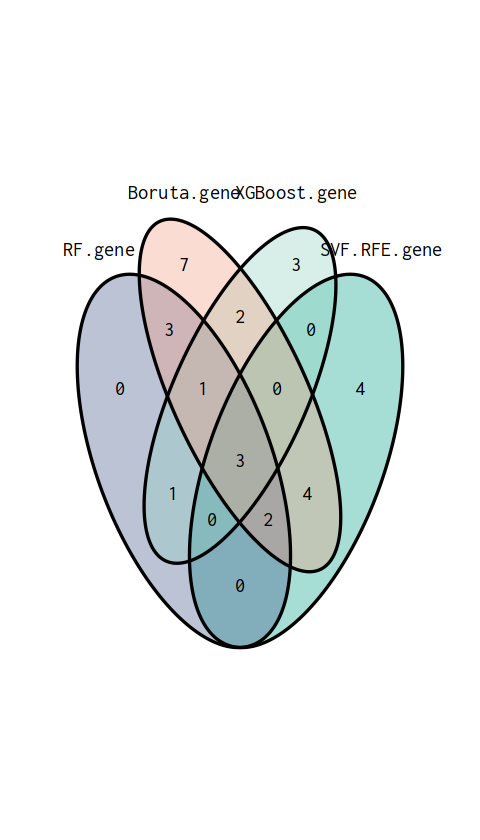

In [71]:
grid.draw(q)

In [72]:
intersect(intersect(intersect(RF.gene,XGBoost.gene),Boruta.gene),lasso.gene)

[1] "BAIAP3" "PIM2"   "CALB2"

In [73]:
model.gene = intersect(lasso.gene,XGBoost.gene)

In [23]:
model.gene  =gene_1se

In [24]:
model.gene

[1] "WDR45"        "SOS1"         "NTHL1"        "MUS81"        "SLC7A9"      
 [6] "CEACAM21"     "HHLA1"        "UCK2"         "LOC100129361" "VWF"         
[11] "RRM2"         "DDX25"

In [25]:
set.seed(1234)

In [26]:
expr3 = cbind(death,expr)

In [27]:
data = expr3

In [28]:
library(autoReg)

In [29]:
overall.log =  glm(death~MUS81+UCK2+CNIH3+OTUD4,data=data,family=binomial())

model3<-autoReg(overall.log,uni=TRUE,milti=TRUE,threshold=0.05)

model3

name,desc,0 (N=14),1 (N=19),id,OR (univariable),OR (multivariable)
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
MUS81,Mean <U+00B1> SD,167.9 <U+00B1> 17.2,154.4 <U+00B1> 15.3,MUS81,"0.95 (0.90-1.00, p=.035)","0.95 (0.90-1.00, p=.035)"
UCK2,Mean <U+00B1> SD,71.6 <U+00B1> 13.8,63.4 <U+00B1> 8.7,UCK2,"0.92 (0.85-1.01, p=.073)",
CNIH3,Mean <U+00B1> SD,42.6 <U+00B1> 15.9,50.5 <U+00B1> 12.1,CNIH3,"1.05 (0.99-1.11, p=.124)",
OTUD4,Mean <U+00B1> SD,31.6 <U+00B1> 3.1,33.6 <U+00B1> 2.2,OTUD4,"1.46 (0.99-2.15, p=.056)",


In [33]:
library(caret)

Warning message:
"package 'caret' was built under R version 4.2.3"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.2.3"

Attaching package: 'ggplot2'


The following object is masked from 'package:randomForest':

    margin


Loading required package: lattice

Warning message:
"package 'lattice' was built under R version 4.2.3"
Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"


In [34]:
data = data[,c('death','MUS81','UCK2','CNIH3','OTUD4')]

In [35]:
set.seed(141)
#单纯10折交叉验证，time=1
folds <-createMultiFolds(y=data$death,k=5,times=5)
#10次批量训练与验证
#做成循环
auc_value<-as.numeric()
for(i in 1:10){
  train<- data[ folds[[i]],] 
  test <- data[-folds[[i]],] 
  model<-glm(death~.,data=train,family=binomial())  #TNFSF14+CCNA2+MARCKS+SGOL1+SAP130
    
  model_pre<-predict(model,type='response', newdata=train)
    
  auc_value<- append(auc_value,
                     as.numeric(pROC::auc(as.numeric(train[,1]),model_pre)))
}
mean(auc_value)

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] 0.8057001

In [36]:
auc_value

[1] 0.7375000 0.8579882 0.7857143 0.8352273 0.8647059 0.8636364 0.7515152
 [8] 0.7500000 0.7000000 0.9107143

In [69]:
num <- which.max(auc_value)
print(num)

fold_test <- data[folds[[num]],]   
fold_train <- data[-folds[[num]],]

fold_pre <- glm(death~.,data=fold_train,family=binomial())

fold_predict <- predict(fold_pre,type='response',newdata=fold_test)

options(repr.plot.width = 6)

[1] 10


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


In [37]:
fold_pre <- glm(death~.,data=data,family=binomial())

fold_predict <- predict(fold_pre,type='response',newdata=data)

options(repr.plot.width = 6)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



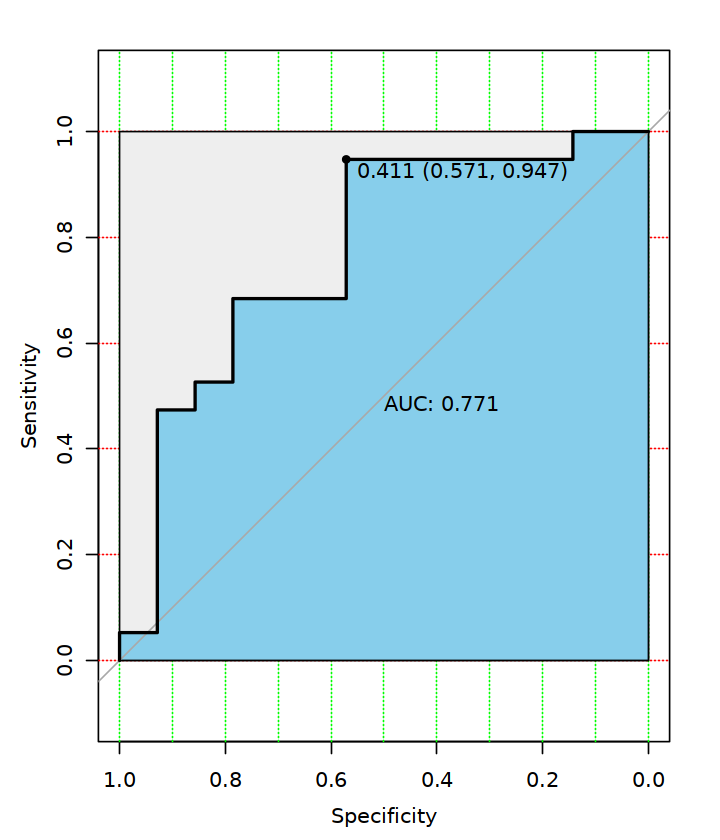

In [38]:
roc_curve <- pROC::roc(as.numeric(data$death),fold_predict)
plot(roc_curve, print.auc=TRUE, auc.polygon=TRUE, grid=c(0.1, 0.2),
     grid.col=c("green", "red"), max.auc.polygon=TRUE,
     auc.polygon.col="skyblue", print.thres=TRUE,main="")